# Loan Approval Prediction
We will predict whether bank loan will be approved or not based on applicant data

We will do the following:
1. Process and data and make it ready for modeling.
2. Use different ways to model Decision Trees and Random Forest. Use Pruning, Cross Validation and Bagging(random forest) to improve model.
3. Compare the results. 


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Data processing

In [4]:
df = pd.read_csv("loans.csv")
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [5]:
df.dtypes 

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

## Observations from intial reading of the data

1. Drop Unnamed and Loan_ID columns, they are redundant.
2. Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status columns need to be factorized.
3. Total_Income column should be converted to numbers.

In [6]:
#get unique values from columns
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in cols:
    print(df[f'{i}'].value_counts())

Male      400
Female     91
Name: Gender, dtype: int64
Yes    322
No     175
Name: Married, dtype: int64
0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64
Graduate        393
Not Graduate    107
Name: Education, dtype: int64
No     407
Yes     66
Name: Self_Employed, dtype: int64
Semiurban    188
Urban        171
Rural        141
Name: Property_Area, dtype: int64
Y    345
N    155
Name: Loan_Status, dtype: int64


In [7]:
#we will replace columns containing repeating string objects with numbers, which is compliant with the model
df.replace({
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Dependents':{'3+':3},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Property_Area':{'Urban':1,'Semiurban':2,'Rural':3},
    'Loan_Status':{'Y':1,'N':0}
},inplace=True)

In [8]:
df['Total_Income'] = df['Total_Income'].str.replace('$', '').astype(float)

/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_7667/2068245231.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_Income'] = df['Total_Income'].str.replace('$', '').astype(float)


In [9]:
df = df.drop(['Unnamed: 0','Loan_ID'],axis=1)

In [10]:
df.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Total_Income         float64
dtype: object

In [11]:
df = df.dropna()
df.shape

(390, 13)

## 1. Full Decision Tree

In [12]:
# split the data into training and testing sets 
from sklearn.model_selection import train_test_split

In [13]:
df = df.dropna()
X = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
ypred1 = model1.predict(X_test)

# Predictions from full tree

Now that we have the full tree, we will look at it's performance metrics
1. Confusion Matrix
2. Accuracy score
3. Precision Score
4. Performance Report
5. Plotting the tree

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay



[[20 13]
 [15 50]]


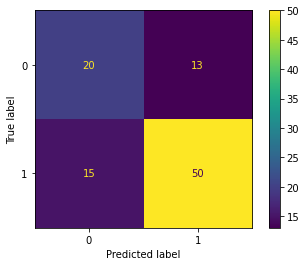

In [18]:
print(confusion_matrix(ypred1,y_test))
cm = confusion_matrix(ypred1,y_test,labels=model1.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=model1.classes_)
disp.plot()

In [19]:
from sklearn.metrics import accuracy_score

**Accuracy Score** is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

In [22]:
#two ways to get the accuracy score
print(accuracy_score(ypred1,y_test))
print((cm[1,1]+cm[0,0])/(cm[1,1]+cm[0,0]+cm[0,1]+cm[1,0]))

0.7142857142857143
0.7142857142857143


In [23]:
from sklearn.metrics import precision_score

**Precision Score** is given by

$$
\frac{TP}{TP+FP}
$$

In [24]:
precision_score(ypred1,y_test)

0.7936507936507936

In [25]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(ypred1,y_test))
#target_names=['rejected','approved']

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        33
           1       0.79      0.77      0.78        65

    accuracy                           0.71        98
   macro avg       0.68      0.69      0.68        98
weighted avg       0.72      0.71      0.72        98



## Plotting the full decision tree

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

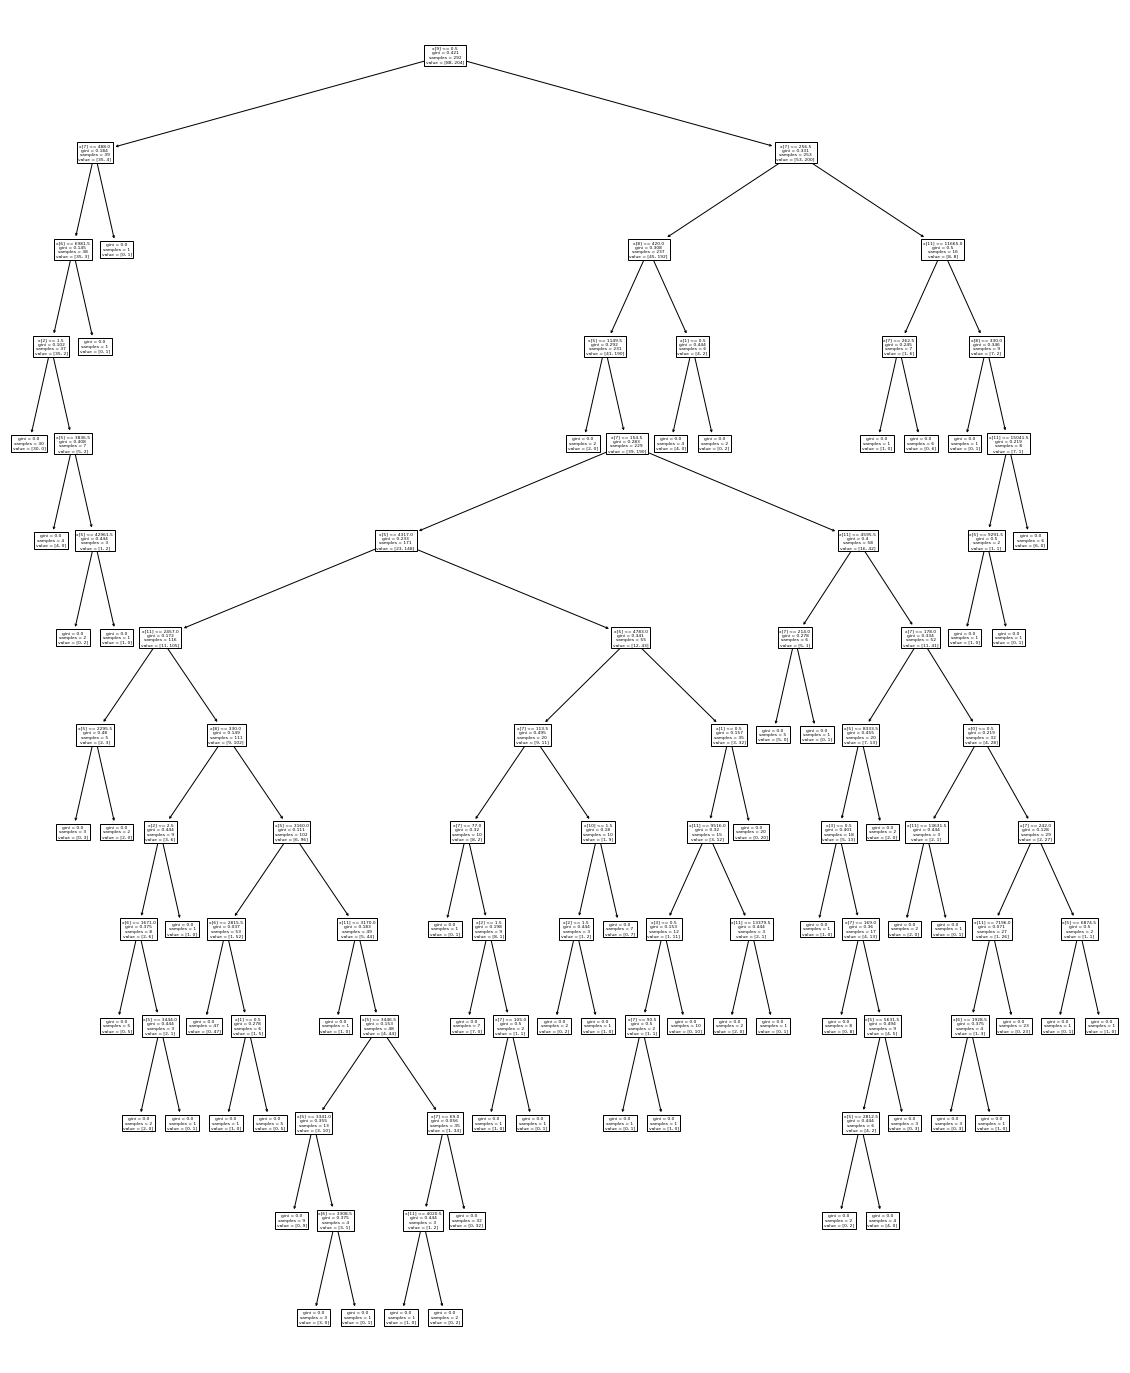

In [27]:
fig = plt.figure(figsize = (20,25))
tree.plot_tree(model1)
plt.show()

In [23]:
#model1.predict_proba(y_test)

## Prepruning the Tree

Here we will *tinkle* with the tree depth and impurity critierias: gini and entropy

In [28]:
max_depth = [i for i in range(1,16)]
gini_acc = []
ent_acc = []

for i in (max_depth):
    models = DecisionTreeClassifier(max_depth=i,criterion='gini')
    models.fit(X_train,y_train)
    preds = models.predict(X_test)
    gini_acc.append(accuracy_score(preds,y_test))
    
    models = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    models.fit(X_train,y_train)
    preds = models.predict(X_test)
    ent_acc.append(accuracy_score(preds,y_test))


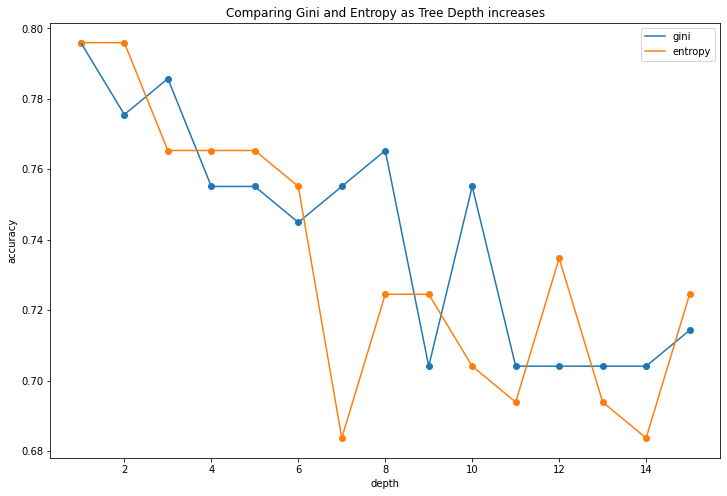

In [29]:
plt.figure(figsize = (12,8))
plt.scatter(max_depth,gini_acc)
plt.scatter(max_depth,ent_acc)
plt.plot(max_depth,gini_acc,label='gini')
plt.plot(max_depth,ent_acc,label='entropy')
plt.title("Comparing Gini and Entropy as Tree Depth increases")
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

It appears that the best accuracy is achieved by both gini and entropy at depth 1!

In [33]:
model2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
model2.fit(X_train,y_train)
train_pred_2 = model2.predict(X_train)
ypred2 = model2.predict(X_test)
print("Train accuracy:",accuracy_score(train_pred_2,y_train))
print("Test accuracy:",accuracy_score(ypred2,y_test))

Train accuracy: 0.8047945205479452
Test accuracy: 0.7959183673469388


In [34]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))
print(accuracy_score(ypred2,y_test))

0.8047945205479452
0.7959183673469388
0.7959183673469388


Now we will use **GridSearchCV** to search for specified parameter values of our model/estimator. 

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {'max_depth' : [i for i in range(1,15)],
         'min_samples_split' : [i for i in range(2,6)],
         'min_samples_leaf' : [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params, cv = 10)
gcv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5]})

In [37]:

print(gcv.best_estimator_)
gcv.get_params()

DecisionTreeClassifier(max_depth=1)


{'cv': 10,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  'min_samples_split': [2, 3, 4, 5],
  'min_samples_leaf': [1, 2]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

Train score 0.8047945205479452
Test score 0.7959183673469388


<Figure size 432x288 with 0 Axes>

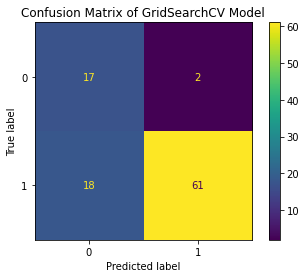

In [39]:
model3 = gcv.best_estimator_
model3.fit(X_train,y_train)
y_train_pred = model3.predict(X_train)
ypred3 = model3.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(ypred3,y_test)}')
#cm1 = confusion_matrix(y_train_pred,y_train)
cm2 = confusion_matrix(ypred3,y_test)

plt.figure()

# disp1 = ConfusionMatrixDisplay(cm1)
# disp1.plot()
# plt.title("Training CM of GridSearchCV Model")
# plt.show()

disp2 = ConfusionMatrixDisplay(cm2)
disp2.plot()
plt.title("Confusion Matrix of GridSearchCV Model")
plt.show()


In [41]:
print(gcv.best_params_)
print(gcv.best_score_) #fitting training data

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8048275862068965


## Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gcv, X, y, cv=10)


In [43]:
print(scores)
print(scores.mean())

[0.76923077 0.79487179 0.76923077 0.79487179 0.74358974 0.79487179
 0.79487179 0.79487179 0.8974359  0.84615385]
0.7999999999999999


In [44]:
from sklearn.model_selection import cross_val_predict

In [45]:
cross_val_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv = 10)

In [46]:
accuracy_score(cross_val_pred,y)

0.7205128205128205


## PostPruning
Now will see how changing the tuning parameter $\alpha$ affects the accuracy

In [47]:
dtree = DecisionTreeClassifier() #intializing the calssifier

paths = dtree.cost_complexity_pruning_path(X_train,y_train)
#get ccp alpphas

ccp_alphas = paths.ccp_alphas

print(ccp_alphas)

[0.         0.00293542 0.00299658 0.00304414 0.00308219 0.00313927
 0.00318847 0.00332681 0.00336004 0.00391389 0.00416938 0.00431939
 0.00456621 0.00466134 0.00487062 0.00492889 0.00570776 0.00577612
 0.00581456 0.00587084 0.00601208 0.00913242 0.01019198 0.01037273
 0.1095375 ]


In [48]:
trees = []

for i in ccp_alphas:
    mytree = tree.DecisionTreeClassifier(random_state=42, ccp_alpha = i)
    mytree.fit(X_train,y_train)
    trees.append(mytree)

In [49]:
from sklearn import tree


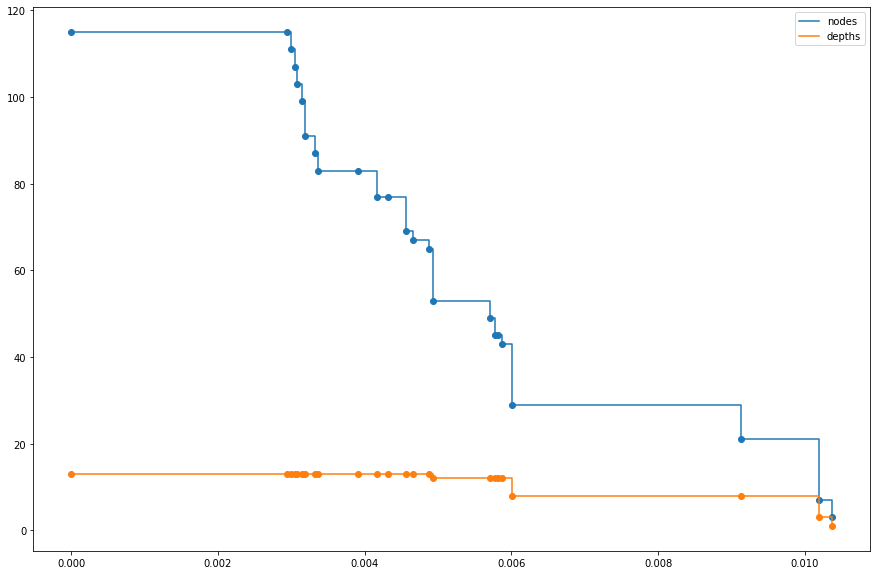

In [50]:
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

nodes = [clf.tree_.node_count for clf in trees]
depths = [clf.tree_.max_depth for clf in trees]

plt.figure(figsize=(15,10))
plt.scatter(ccp_alphas,nodes)
plt.scatter(ccp_alphas,depths)
plt.plot(ccp_alphas,nodes,label='nodes',drawstyle='steps-post')
plt.plot(ccp_alphas,depths,label='depths',drawstyle='steps-post')
plt.legend()
plt.show()


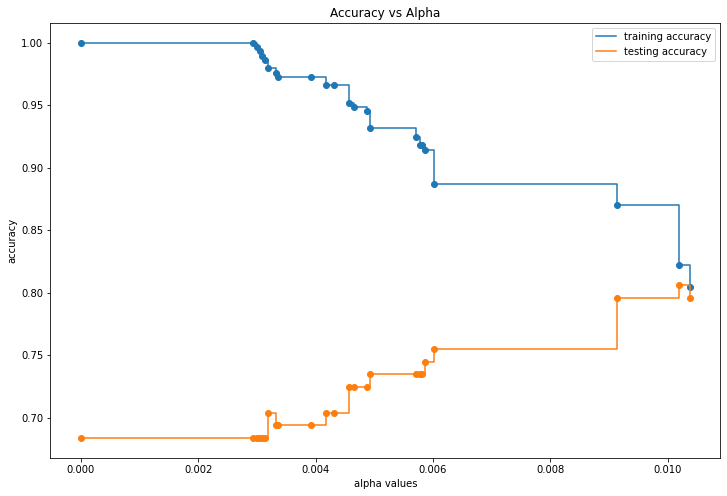

In [51]:
train_acc = []
test_acc = []

for t in trees:
    train_pred = t.predict(X_train)
    test_pred = t.predict(X_test)
    
    train_acc.append(accuracy_score(train_pred,y_train))
    test_acc.append(accuracy_score(test_pred,y_test))
    

plt.figure(figsize=(12,8))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='training accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='testing accuracy',drawstyle="steps-post")
plt.xlabel('alpha values')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()
    

Training Accuracy: 0.8698630136986302
Testing Accuracy: 0.7959183673469388


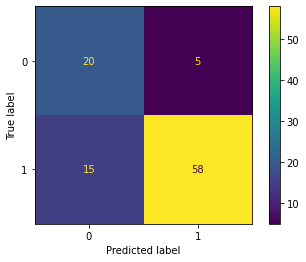

In [52]:
ccpTree = DecisionTreeClassifier(random_state=42,ccp_alpha = 0.010)
ccpTree.fit(X_train,y_train)
ypred4 = ccpTree.predict(X_test)
train_pred = ccpTree.predict(X_train)
print("Training Accuracy:", accuracy_score(train_pred,y_train))
print("Testing Accuracy:",accuracy_score(ypred4,y_test))
cm = confusion_matrix(ypred4,y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
print(X_train.shape)
print(X_test.shape)

(292, 12)
(98, 12)


In [56]:
rf_model = RandomForestClassifier(oob_score = True, max_samples = 0.7, n_estimators = 120)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=120, oob_score=True)

In [57]:
print(rf_model.oob_score_)
print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))

0.797945205479452
0.9965753424657534
0.8163265306122449


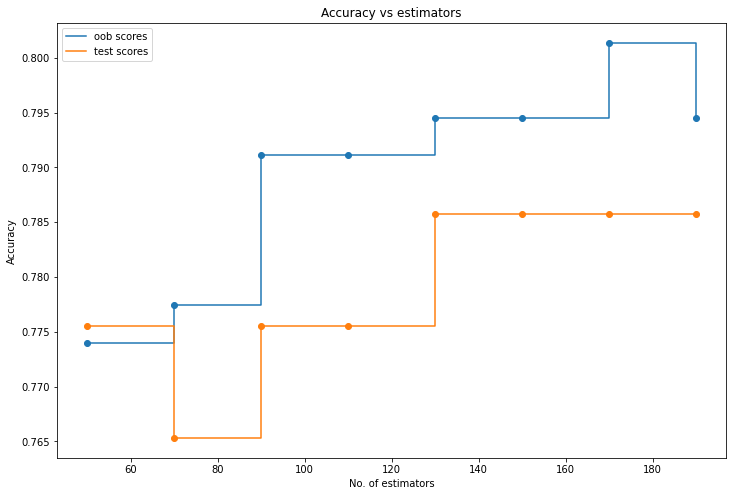

In [59]:
oobs = []
tests = []
x = []
for i in range(50,201,20):
    
    rf = RandomForestClassifier(oob_score = True, max_samples = 0.7, n_estimators = i,random_state=42)
    rf.fit(X_train,y_train)
    
    x.append(i)
    oobs.append(rf.oob_score_)
    tests.append(rf.score(X_test,y_test))


plt.figure(figsize=(12,8))
plt.scatter(x,oobs)
plt.scatter(x,tests)
plt.plot(x,oobs,label="oob scores", drawstyle = "steps-post")
plt.plot(x,tests,label="test scores", drawstyle = "steps-post")
plt.xlabel("No. of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs estimators")
plt.legend()
plt.show()

We can observe that for n= 170, we get the best scores.

In [60]:
rf = RandomForestClassifier(n_estimators = 170, oob_score = True, max_samples = 0.7)
rf.fit(X_train,y_train)
print(rf.score(X_test,y_test))
print(rf.oob_score_)
print(rf.score(X_train,y_train))

0.8061224489795918
0.797945205479452
1.0


In [61]:
ypred_rf = rf.predict(X_test)
accuracy_score(ypred_rf,y_test)

0.8061224489795918

In [64]:
cols = ["Full Decision Tree","Pre-Pruning","GridSearch CV","10-fold CV","Cost-Complexity Pruning","Random Forest"]

test_scores = [accuracy_score(ypred1,y_test),accuracy_score(ypred2,y_test),accuracy_score(ypred3,y_test),
                accuracy_score(cross_val_pred,y),accuracy_score(ypred4,y_test),
               rf.score(X_test,y_test)]

train_scores = [model1.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_train,y_train),
               scores.mean(),ccpTree.score(X_train,y_train),rf.score(X_train,y_train)]

In [65]:
data = {
    "Methods" : cols,
    "Training Set Accuracy" : train_scores,
    "Testing Set Accuracy" : test_scores
}

In [66]:
results = pd.DataFrame(data)
results

,Methods,Training Set Accuracy,Testing Set Accuracy
0,Full Decision Tree,1.000000,0.714286
1,Pre-Pruning,0.804795,0.795918
2,GridSearch CV,0.804795,0.795918
3,10-fold CV,0.800000,0.720513
4,Cost-Complexity Pruning,0.869863,0.795918
5,Random Forest,1.000000,0.806122


It appears that **Random Forest & Cost-Complexity Pruning** are the best methods to model the dataset!